In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [2]:
df=pd.read_csv("exercise_data.csv")
df.head()

,Unnamed: 0,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,14733363,NaN,68,190,94,29,105,40.8,231
1,1,14861698,NaN,20,166,60,14,94,40.3,66
2,2,11179863,NaN,69,179,79,5,88,38.7,26
3,3,16180408,NaN,34,179,71,13,100,40.5,71
4,4,17771927,NaN,27,154,58,10,81,39.8,35


In [3]:
df=df.drop(['Unnamed: 0'], axis=1)
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,NaN,68,190,94,29,105,40.8,231
1,14861698,NaN,20,166,60,14,94,40.3,66
2,11179863,NaN,69,179,79,5,88,38.7,26
3,16180408,NaN,34,179,71,13,100,40.5,71
4,17771927,NaN,27,154,58,10,81,39.8,35


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      14948 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
df.dtypes

User_ID         int64
Gender         object
Age             int64
Height          int64
Weight          int64
Duration        int64
Heart_Rate      int64
Body_Temp     float64
Calories        int64
dtype: object

In [6]:
df.isnull().sum()

User_ID        0
Gender        52
Age            0
Height         0
Weight         0
Duration       0
Heart_Rate     0
Body_Temp      0
Calories       0
dtype: int64

In [7]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


<Axes: ylabel='Height'>

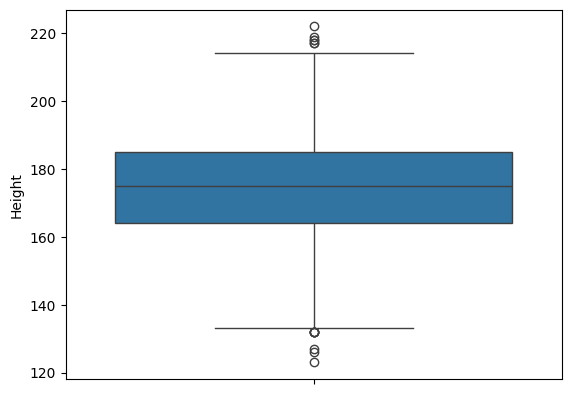

In [8]:
sns.boxplot(df['Height'])

<Axes: ylabel='Height'>

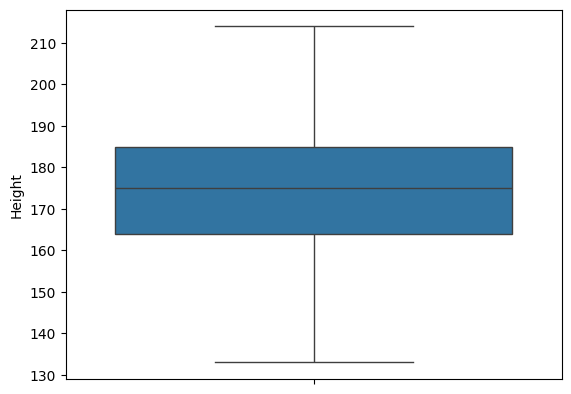

In [9]:
Q1 = df['Height'].quantile(0.25)
Q3 = df['Height'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['Height'] >= lower_bound) & (df['Height'] <= upper_bound)]

sns.boxplot(df_filtered['Height'])

In [10]:
df.isnull().sum()

User_ID        0
Gender        52
Age            0
Height         0
Weight         0
Duration       0
Heart_Rate     0
Body_Temp      0
Calories       0
dtype: int64

# Fill Null Values

In [11]:
df['Gender'].fillna(statistics.mode(df['Gender']), inplace=True)

In [12]:
df.isnull().sum().sum()

0

# Label Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [14]:
df['Gender']=le.fit_transform(df['Gender'])

In [15]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190,94,29,105,40.8,231
1,14861698,0,20,166,60,14,94,40.3,66
2,11179863,0,69,179,79,5,88,38.7,26
3,16180408,0,34,179,71,13,100,40.5,71
4,17771927,0,27,154,58,10,81,39.8,35


In [16]:
df['Gender'].value_counts()

Gender
0    7578
1    7422
Name: count, dtype: int64

# Dependent and Independent Data

In [17]:
X=df.drop('Calories',axis=1)
y=df[['Calories']]

In [18]:
print("shape of X ",X.shape)
print("shape of y ",y.shape)

shape of X  (15000, 8)
shape of y  (15000, 1)


# Split Train and Test Data

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=51)

In [20]:
print("shape of X_train",X_train.shape)
print("shape of X_test ",X_test.shape)
print("shape of y_train ",y_train.shape)
print("shape of y_test ",y_test.shape)

shape of X_train (10500, 8)
shape of X_test  (4500, 8)
shape of y_train  (10500, 1)
shape of y_test  (4500, 1)


## Linear Regression Model

In [21]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [22]:
lr.fit(X_train,y_train)

LinearRegression()

In [23]:
lr.score(X_test,y_test)

0.9657625780202699

# Evaluation Metrics

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [25]:
y_pred=lr.predict(X_test)

In [26]:
y_test

,Calories
10995,94
1277,101
12835,90
2296,76
1926,131
...,...
8161,82
11651,34
2072,28
1603,147


In [27]:
print("Mean Squared Error= ",mean_squared_error(y_test,y_pred))

Mean Squared Error=  131.32014060198813


In [28]:
print("Mean Absolute Error= ",mean_absolute_error(y_test,y_pred))

Mean Absolute Error=  8.458917999012137


In [29]:
print("Root Mean Squared Error= ",np.sqrt(mean_squared_error(y_test,y_pred)))

Root Mean Squared Error=  11.459500015357918


In [30]:
print("R2 Score = ",r2_score(y_test,y_pred))

R2 Score =  0.9657625780202699


# Decision Tree Regression

In [31]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='squared_error')

In [32]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [33]:
regressor.score(X_test,y_test)

0.9918480677784318

# Random Forest Regression

In [34]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=70,criterion = 'squared_error')

In [35]:
rf.fit(X_train,y_train)

<ipython-input-35-d6d9475b85dc>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RandomForestRegressor(n_estimators=70)

In [36]:
rf.score(X_test,y_test)

0.9973006661197169

# Evaluation Metrics

In [37]:
y_pred=rf.predict(X_test)

In [38]:
y_test

,Calories
10995,94
1277,101
12835,90
2296,76
1926,131
...,...
8161,82
11651,34
2072,28
1603,147


In [39]:
print("Mean Squared Error= ",mean_squared_error(y_test,y_pred))

Mean Squared Error=  10.353492879818594


In [40]:
print("Mean Absolute Error= ",mean_absolute_error(y_test,y_pred))

Mean Absolute Error=  1.964069841269841


In [41]:
print("Root Mean Squared Error= ",np.sqrt(mean_squared_error(y_test,y_pred)))

Root Mean Squared Error=  3.2176843971742466


In [42]:
print("R2 Score = ",r2_score(y_test,y_pred))

R2 Score =  0.9973006661197169


# KNN Regression

In [43]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=2)

In [44]:
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [45]:
knn.score(X_test,y_test)

-0.5292619113730559

# Regulation L1 & L2

In [46]:
from sklearn.linear_model import Ridge,Lasso

In [47]:
rd=Ridge()
rd.fit(X_train,y_train)
rd.score(X_test,y_test)

0.965762295696077

In [48]:
la=Lasso()
la.fit(X_train,y_train)
la.score(X_test,y_test)

0.9627233276188208

In [49]:
rd2=Ridge(alpha=2)
rd2.fit(X_train,y_train)
rd2.score(X_test,y_test)

0.9657620009359028

In [50]:
ls2=Lasso(alpha=4)
ls2.fit(X_train,y_train)
ls2.score(X_test,y_test)

0.9569069613161632

# K Fold

In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
score_rf=cross_val_score(RandomForestRegressor(n_estimators=50),X_train,y_train,cv=3)
print(score_rf)
print("avg",np.average(score_rf))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[0.99717437 0.99606553 0.99693562]
avg 0.9967251730231955


In [53]:
score_dt=cross_val_score(DecisionTreeRegressor(criterion='squared_error'),X_train,y_train,cv=2)
print(score_dt)
print("avg",np.average(score_dt))


[0.98831573 0.98763761]
avg 0.9879766709733528
